In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [28]:
df = pd.read_csv('E:\Hack\Main.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12196\850810759.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('E:\Hack\Main.csv')


,Machine ID,Timestamp,Temperature,Pressure,Vibration,Energy Consumption,Failure
0,170,5/14/2023 10:48,46,33,7.40,45.98,0
1,431,11/3/2022 10:48,95,64,4.39,31.70,0
2,881,11/11/2021 10:48,82,89,8.45,142.69,0
3,886,7/29/2024 10:48,42,61,8.88,18.14,0
4,752,10/6/2022 10:48,25,54,5.69,104.08,0


In [40]:
df= df.drop(['Machine ID','Timestamp'], axis=1)
df.head()

,Temperature,Pressure,Vibration,Energy Consumption,Failure
0,46,33,7.40,45.98,0
1,95,64,4.39,31.70,0
2,82,89,8.45,142.69,0
3,42,61,8.88,18.14,0
4,25,54,5.69,104.08,0


In [30]:
print(df.describe())

       Temperature     Pressure    Vibration  Energy Consumption      Failure
count  1204.000000  1204.000000  1204.000000         1204.000000  1204.000000
mean     59.178571    64.886213     5.410407          101.805316     0.047342
std      23.738227    20.960506     3.252292           58.062637     0.212458
min      17.000000    25.000000     0.000000            1.080000     0.000000
25%      38.000000    47.000000     2.450000           53.727500     0.000000
50%      60.000000    65.000000     5.380000          101.710000     0.000000
75%      79.000000    83.000000     8.300000          152.000000     0.000000
max     103.000000   105.000000    10.980000          200.950000     1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         1204 non-null   int64  
 1   Pressure            1204 non-null   int64  
 2   Vibration           1204 non-null   float64
 3   Energy Consumption  1204 non-null   float64
 4   Failure             1204 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 47.2 KB


In [54]:
#Matplotlib for plotting the graphs
import matplotlib.pyplot as plt

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


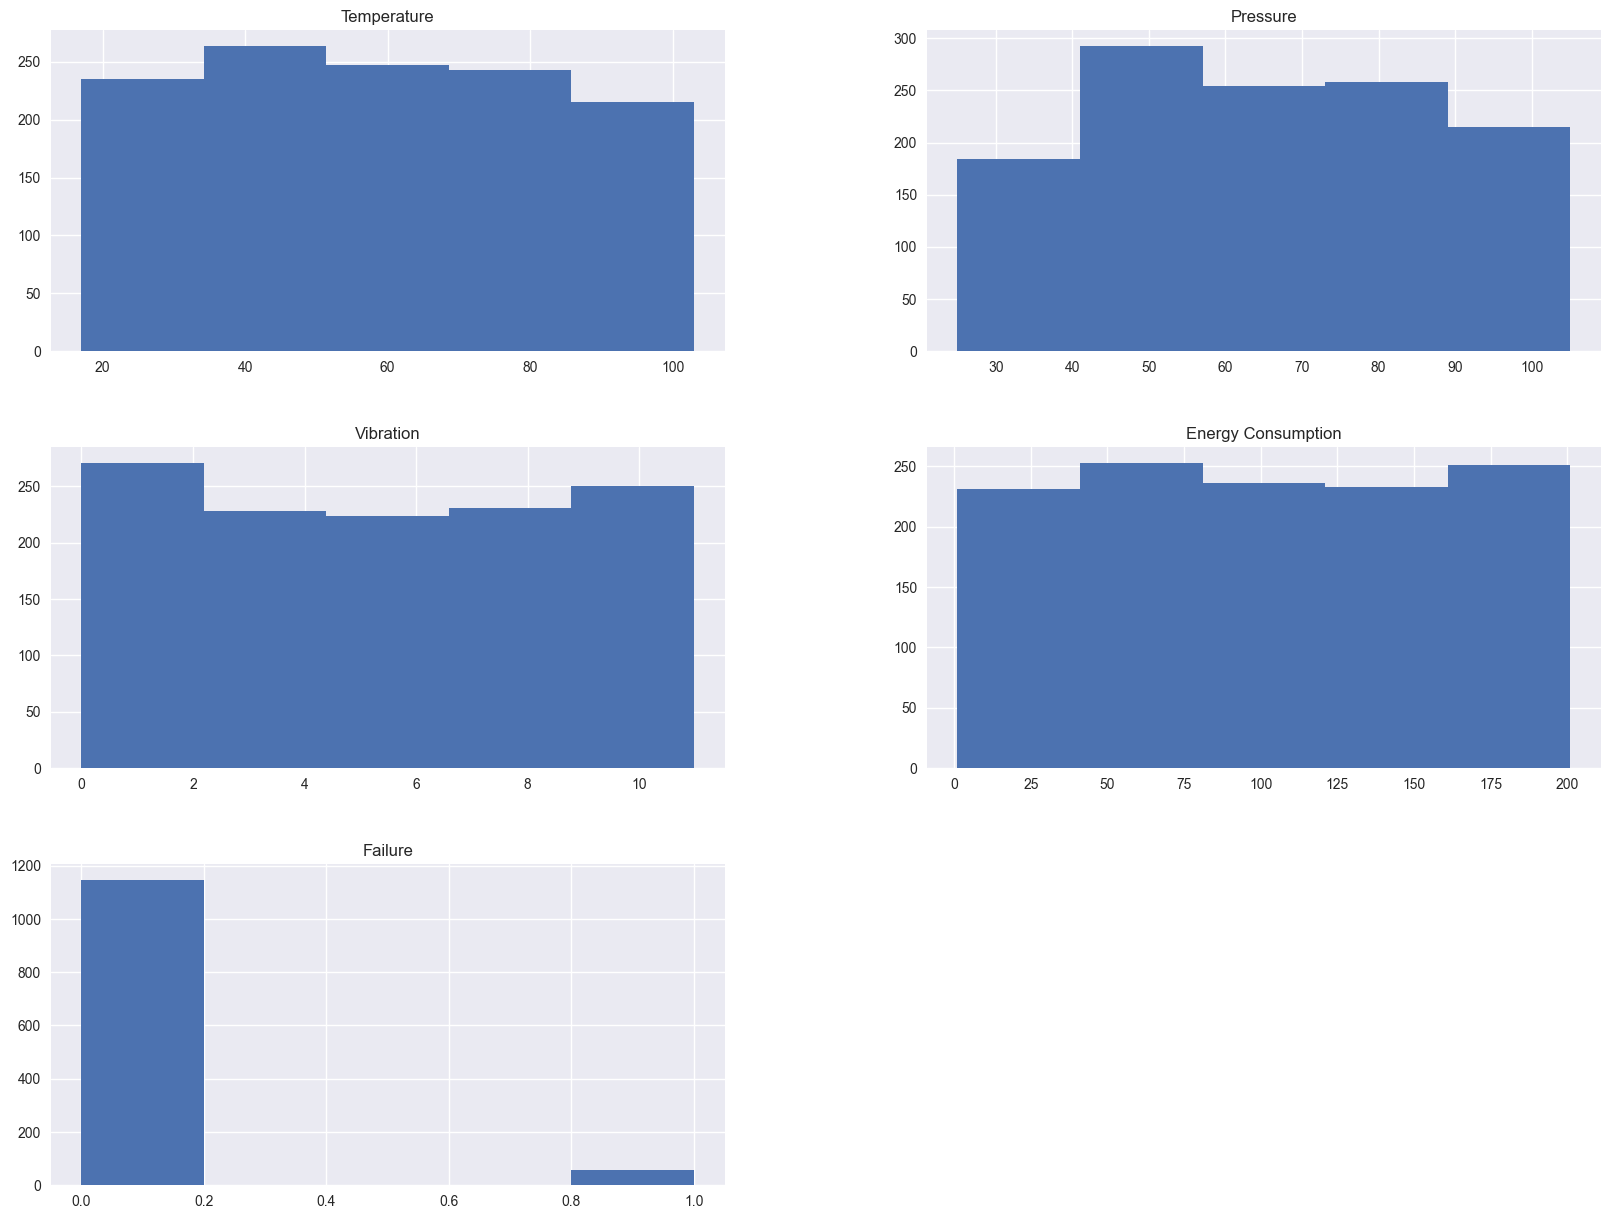

In [55]:
print(plt.style.available)
plt.style.use('seaborn-v0_8')
df.hist(bins=5 , figsize=(20,15))
plt.show()

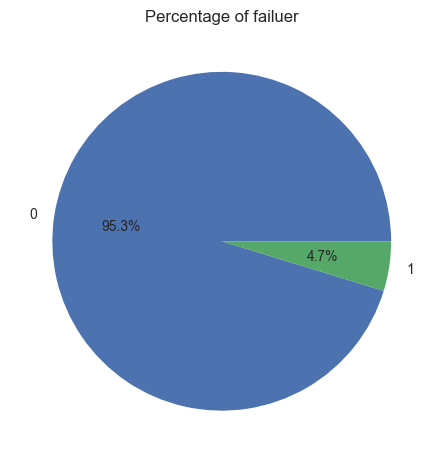

In [56]:
percentage = df["Failure"].value_counts(normalize=True)*100
class_lables = [0 , 1]
plt.pie(percentage , labels=class_lables , autopct="%1.1f%%")
plt.title("Percentage of failuer")
plt.show()

#### Any Null values 

In [43]:
print(df.isnull().sum())

Temperature           0
Pressure              0
Vibration             0
Energy Consumption    0
Failure               0
dtype: int64


In [44]:
df.head()

,Temperature,Pressure,Vibration,Energy Consumption,Failure
0,46,33,7.40,45.98,0
1,95,64,4.39,31.70,0
2,82,89,8.45,142.69,0
3,42,61,8.88,18.14,0
4,25,54,5.69,104.08,0


### Features and target variable

In [45]:
X = df.drop(['Failure'], axis=1)  # Features
y = df['Failure']  # Target variable

### train test split

In [46]:
# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


### Model Selection and Hyperparameter Tuning

In [48]:
log_reg_model = LogisticRegression(max_iter=1000)

In [51]:
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_test)



Text(0.5, 1.0, 'After\xa0Scalling')

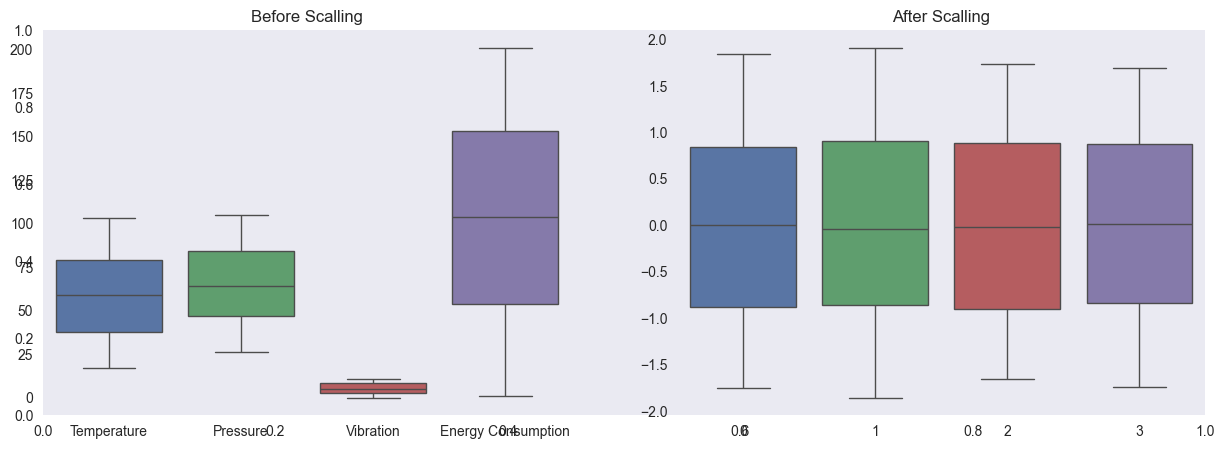

In [62]:
plt.subplots(figsize=(15 , 5))
plt.subplot(1 , 2, 1)
sns.boxplot(data=X_train)
plt.title("Before Scalling")
plt.subplot(1 , 2 , 2)
sns.boxplot(data=X_train_scaled)
plt.title("After Scalling")

#### Evaluation

In [52]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       234
           1       0.00      0.00      0.00         7

    accuracy                           0.97       241
   macro avg       0.49      0.50      0.49       241
weighted avg       0.94      0.97      0.96       241

Logistic Regression Confusion Matrix:
 [[234   0]
 [  7   0]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo